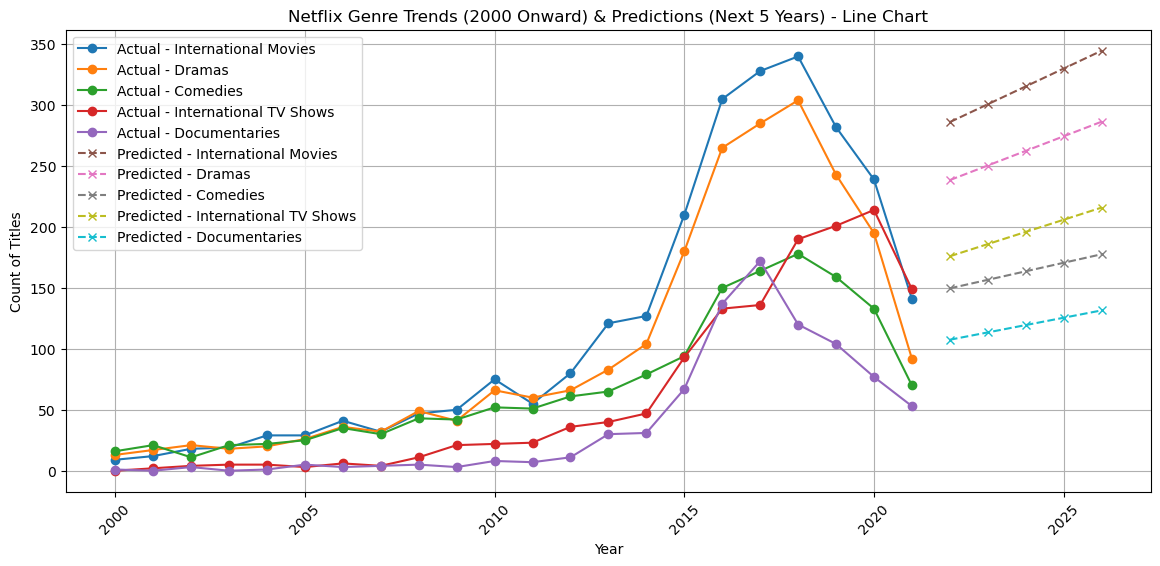

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("cleaned_netflix_titles.csv", lineterminator="\n")

df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df = df.dropna(subset=['release_year']) 

df['listed_in'] = df['listed_in'].str.split(', ')
df = df.explode('listed_in')

genre_trends = df.groupby(['release_year', 'listed_in']).size().unstack(fill_value=0)

top_genres = genre_trends.sum().nlargest(5).index
filtered_data = genre_trends[top_genres]

filtered_data = filtered_data.loc[2000:]

# Predict future values next 5 years
future_years = np.array(range(filtered_data.index.max() + 1, filtered_data.index.max() + 6)).reshape(-1, 1)
future_predictions = {genre: [] for genre in top_genres}

for genre in top_genres:
    X = filtered_data.index.values.reshape(-1, 1)  # Independent variable (Years)
    y = filtered_data[genre].values  # Dependent variable (Number of titles)

    model = LinearRegression()
    model.fit(X, y)  

    predictions = model.predict(future_years)  
    future_predictions[genre] = predictions  

future_df = pd.DataFrame(future_predictions, index=future_years.flatten())


plt.figure(figsize=(14, 6))

for genre in top_genres:
    plt.plot(filtered_data.index, filtered_data[genre], marker='o', label=f"Actual - {genre}")

for genre in top_genres:
    plt.plot(future_df.index, future_df[genre], linestyle='dashed', marker='x', label=f"Predicted - {genre}")

plt.xlabel("Year")
plt.ylabel("Count of Titles")
plt.title("Netflix Genre Trends (2000 Onward) & Predictions (Next 5 Years) - Line Chart")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
